In [ ]:
#   importing required libraries

import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from skimage.measure import label, regionprops
from scipy.spatial.distance import cosine

In [ ]:
#   Loading and Preprocessing Br35H Brain Tumor Detection 2020 Dataset
#   Dataset Link: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

tumor_pos = []
tumor_neg = []

for file in glob.iglob('/kaggle/input/brain-tumor-detection/yes/*'):
    img = cv2.imread(file) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (150, 150)) 
    tumor_pos.append((img, 1))               #label 1 is for a tumor positive image

for file in glob.iglob('/kaggle/input/brain-tumor-detection/no/*'):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150)) 
    tumor_neg.append((img, 0))               #label 0 is for a tumor negative image

data = tumor_pos + tumor_neg
x = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])

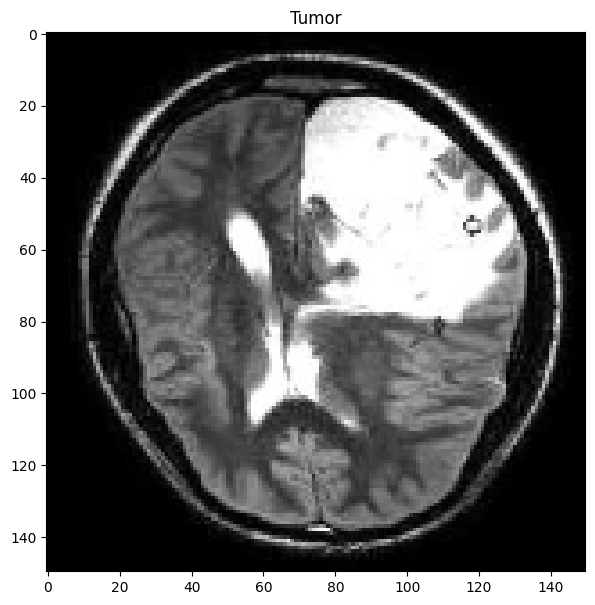

In [ ]:
#   Visualizing the data
def plot_img(i):
    plt.figure(figsize=(7,7))
    plt.imshow(x[i])
    if y[i]==1:
        plt.title('Tumor')
    if y[i]==0:
        plt.title('No_Tumor')

plot_img(42) 

In [ ]:
#   Shuffling the dataset to create randomness and avoid overfitting
x, y = shuffle(x, y, random_state=42)

In [ ]:
#   Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [ ]:
#   Normalization of the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
#   CNN model definition
model= keras.models.Sequential([
    
    keras.layers.Conv2D(32,(3,3),kernel_initializer='he_uniform', input_shape=(150,150,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.1),
    
    keras.layers.Conv2D(64, (3,3), kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256, (3,3), kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512, (3,3), kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(512, (3,3), kernel_initializer='he_uniform', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,573,057 (21.26 MB)

 Trainable params: 5,570,049 (21.25 MB)

 Non-trainable params: 3,008 (11.75 KB)

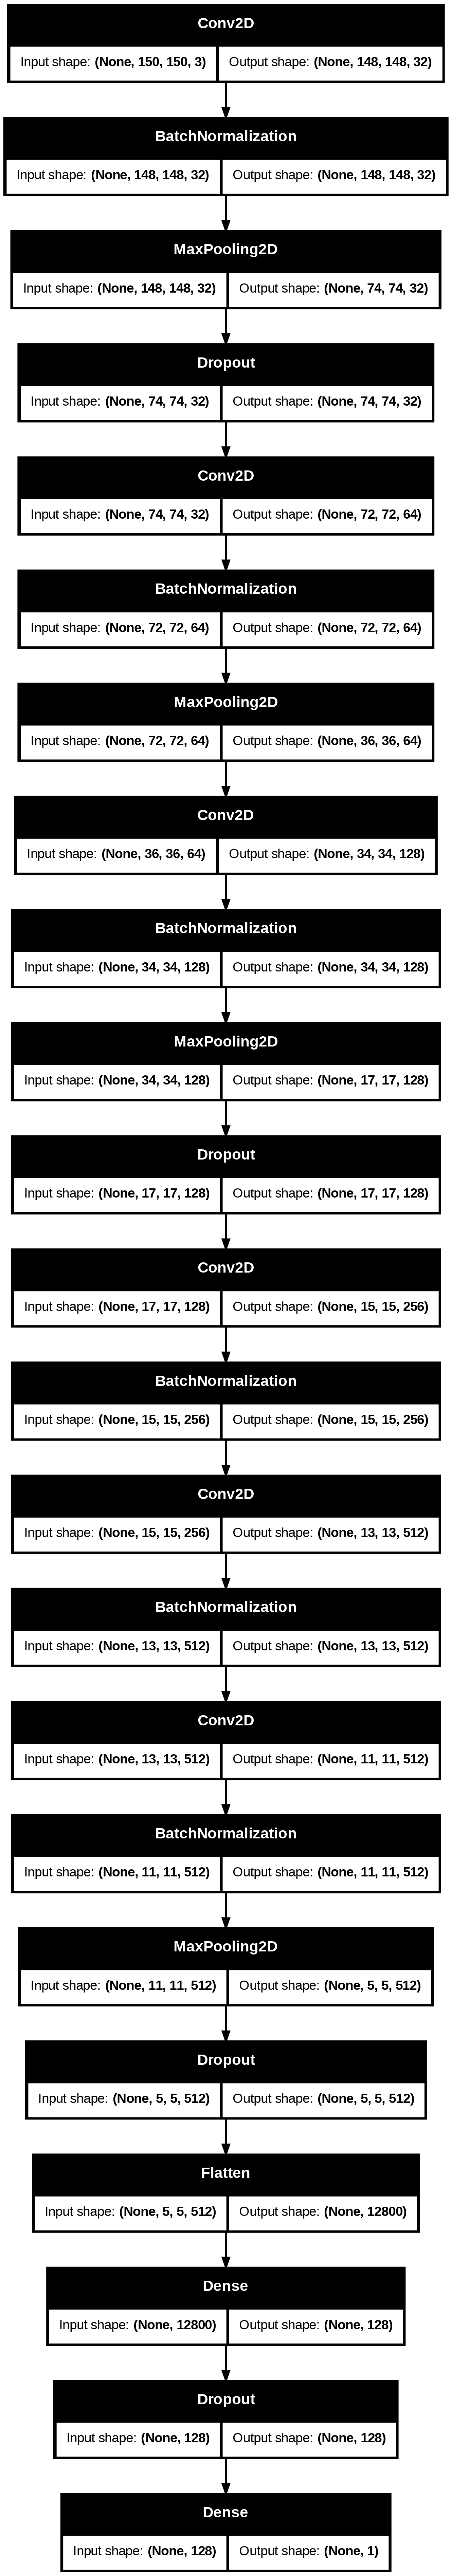

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#   Fitting the model

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 1.0000 - loss: 4.2509e-05 - val_accuracy: 0.9817 - val_loss: 0.3243
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 1.0000 - loss: 1.1523e-04 - val_accuracy: 0.9817 - val_loss: 0.3228
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9992 - loss: 9.3336e-04 - val_accuracy: 0.9817 - val_loss: 0.3462
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 1.0000 - loss: 5.2303e-05 - val_accuracy: 0.9783 - val_loss: 0.3386
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9998 - loss: 5.1586e-04 - val_accuracy: 0.9767 - val_loss: 0.3395
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9993 - loss: 0.0066 - val_accuracy: 0.9800 - val_loss: 0.3273
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9998 - loss: 1.5888e-04 - val_accuracy: 0.9783 - val_loss: 0.3167
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 1.0000 - loss: 5

In [ ]:
#   Evaluating trained model with test data

model.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9877 - loss: 0.2085


[0.19501309096813202, 0.9883333444595337]

In [ ]:
#   Predicting the Tumor Classification

y_pred = model.predict(x_test)
y_pred = np.round(y_pred,0)
y_pred[:5]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
#   Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       272
           1       0.99      0.98      0.99       328

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



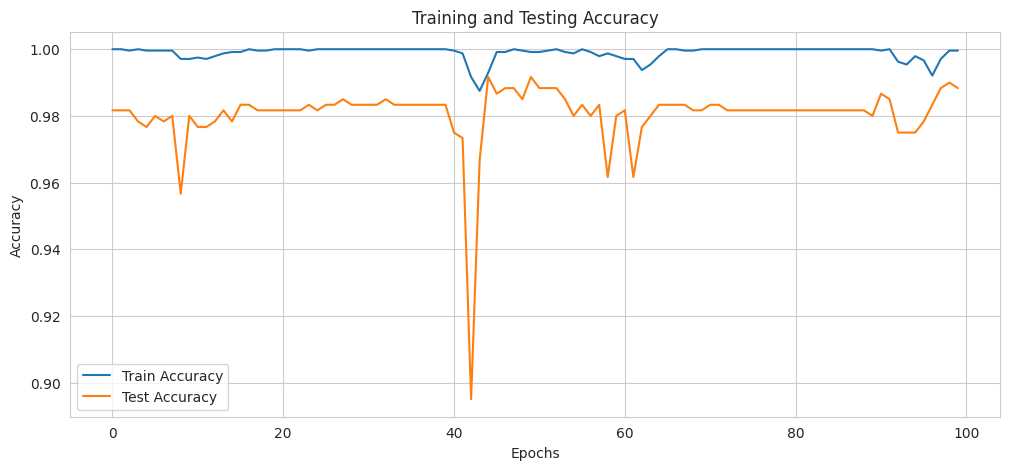

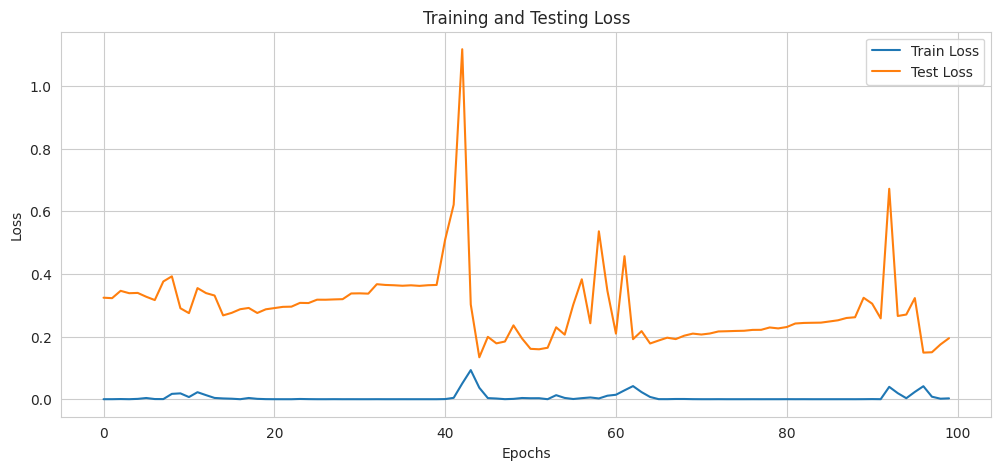

In [ ]:
#   Training and Testing Accuracy

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#   Training and Testing Loss

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

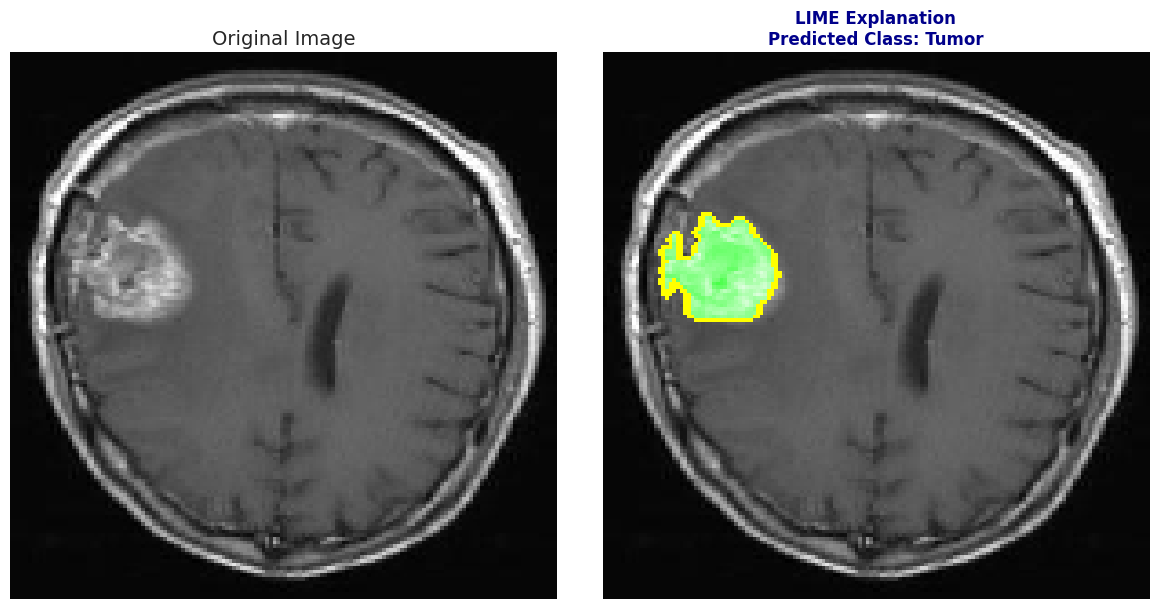

In [ ]:
#   LIME Explanation for Brain Tumor Classification

import lime
import lime.lime_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.segmentation import mark_boundaries
from skimage.segmentation import quickshift

# Set a stylish theme for visualization
sns.set_style("whitegrid")

# Load and preprocess the image
sample_image = '/kaggle/input/brain-tumor-detection/Br35H-Mask-RCNN/TEST/y701.jpg'  # Path to the sample tumor image
image = tf.keras.preprocessing.image.load_img(sample_image, target_size=(150, 150))  # Resize to match model input size
image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize pixel values to [0,1]

# Remove batch dimension for LIME
image_array_no_batch = image_array.astype('double')

# Define a prediction function for LIME
def model_predict(images):
    """
    Function to pass image batches through the trained model and return predictions.
    LIME requires the model's output in a binary classification format.
    """
    images = np.array(images)  # Convert to NumPy array
    images = images.reshape((-1, 150, 150, 3))  # Ensure correct shape (batch_size, height, width, channels)
    preds = model.predict(images)  # Get model predictions
    return np.hstack([1 - preds, preds])  # Convert to binary class format [No Tumor, Tumor]

# Get predicted class label for the sample image
predictions = model_predict([image_array_no_batch])
predicted_class_idx = np.argmax(predictions)  # Extract the class with the highest probability

# Define class labels for binary classification
class_labels = ["No Tumor", "Tumor"]
predicted_class_name = class_labels[predicted_class_idx]  # Get the predicted class name

# Initialize LIME explainer with quickshift segmentation
explainer = lime.lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image_array_no_batch,  # Input image without batch dimension
    model_predict,         # Prediction function
    top_labels=3,          # Number of top labels to consider
    hide_color=0,          # Background color for hidden segments
    num_samples=1000,      # Number of perturbed samples to generate
    segmentation_fn=lambda img: quickshift(img, kernel_size=2, max_dist=300, ratio=0.75)  # Image segmentation function
)

# Generate LIME explanation highlighting important regions
lime_img, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # Get the most important class label
    positive_only=False,        # Highlight both positive and negative features
    num_features=1,             # Number of features to highlight
    hide_rest=False             # Show the entire image with explanations
)

# Mark boundaries on the original image to visualize LIME explanations
highlighted_image = mark_boundaries(lime_img, mask)

# Create a side-by-side plot to compare original and LIME-explained images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax[0].imshow(image_array)
ax[0].set_title("Original Image", fontsize=14)
ax[0].axis("off")

# Display the LIME explanation image with highlighted regions
ax[1].imshow(highlighted_image)
ax[1].set_title(f"LIME Explanation\nPredicted Class: {predicted_class_name}",
                fontsize=12, fontweight='bold', color='darkblue')
ax[1].axis("off")

# Adjust layout and show final visualization
plt.tight_layout()
plt.show()


In [ ]:
#   Evaluating LIME Explanations Using Fidelity, Stability, Localization, and Sparsity Metrics

def generate_ground_truth_mask(image_path, target_size=(150, 150)):
    """ 
    Generates a binary ground truth mask for a given tumor image.
    - Converts the grayscale image to a binary mask using thresholding.
    - Applies morphological operations to remove noise.
    - Resizes the mask to match the model input size.
    
    Args:
        image_path (str): Path to the tumor image.
        target_size (tuple): Target size for resizing the mask.

    Returns:
        np.ndarray: Binary mask of the tumor region.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    _, binary_mask = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)  # Apply thresholding
    
    # Apply morphological operations to remove small noise
    kernel = np.ones((5, 5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)  # Close gaps in mask
    
    # Resize mask to match model input size
    binary_mask = cv2.resize(binary_mask, target_size, interpolation=cv2.INTER_NEAREST)
    
    return binary_mask // 255  # Normalize to binary mask (values 0 or 1)

def fidelity_score(explainer, image, model_predict, top_label, num_samples=1000):
    """
    Calculates Fidelity Score for LIME explanations.
    - Measures how much the explanation affects model predictions.
    - Compares the original model prediction to the masked prediction.

    Args:
        explainer (LimeImageExplainer): LIME explainer object.
        image (np.ndarray): Input image.
        model_predict (function): Model prediction function.
        top_label (int): Index of the predicted class.
        num_samples (int): Number of perturbed samples for LIME.

    Returns:
        float: Fidelity score (absolute difference between original and masked predictions).
    """
    explanation = explainer.explain_instance(image, model_predict, top_labels=top_label, num_samples=num_samples)
    lime_img, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
    
    original_pred = model_predict([image])[0, top_label]  # Model prediction on original image
    masked_pred = model_predict([lime_img])[0, top_label]  # Model prediction on masked image
    
    return abs(original_pred - masked_pred)  # Absolute difference in predictions

def stability_score(explainer, image, model_predict, num_samples=1000, perturbations=5):
    """
    Measures the stability of LIME explanations.
    - Runs LIME multiple times on the same image.
    - Computes the variance in feature attributions across different runs.
    - Lower variance indicates higher stability.

    Args:
        explainer (LimeImageExplainer): LIME explainer object.
        image (np.ndarray): Input image.
        model_predict (function): Model prediction function.
        num_samples (int): Number of perturbed samples for LIME.
        perturbations (int): Number of times LIME is re-run.

    Returns:
        float: Stability score (1 - standard deviation of feature attributions).
    """
    masks = []
    for _ in range(perturbations):
        explanation = explainer.explain_instance(image, model_predict, top_labels=1, num_samples=num_samples)
        _, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=1, hide_rest=True)
        masks.append(mask.flatten())  # Store flattened mask
    
    mean_mask = np.mean(masks, axis=0)  # Compute mean mask
    return 1 - np.std(mean_mask)  # Stability score (lower variance is better)

def localization_accuracy(mask, ground_truth_mask):
    """
    Calculates Localization Accuracy using Intersection over Union (IoU).
    - Measures the overlap between the LIME explanation and the ground truth mask.
    
    Args:
        mask (np.ndarray): LIME explanation mask.
        ground_truth_mask (np.ndarray): Ground truth binary mask.

    Returns:
        float: IoU score (higher values indicate better localization).
    """
    intersection = np.logical_and(mask, ground_truth_mask).sum()  # Common pixels between the two masks
    union = np.logical_or(mask, ground_truth_mask).sum()  # Total pixels covered by either mask
    return intersection / union if union > 0 else 0  # Compute IoU score

def explanation_sparsity(mask):
    """
    Measures the sparsity of a LIME explanation.
    - Calculates the proportion of unhighlighted pixels in the explanation.
    
    Args:
        mask (np.ndarray): LIME explanation mask.

    Returns:
        float: Sparsity score (proportion of pixels not highlighted by LIME).
    """
    return np.sum(mask == 0) / mask.size  # Fraction of pixels not highlighted by LIME

# ===================== Example Usage =====================

# Generate ground truth mask for comparison
ground_truth_mask = generate_ground_truth_mask(sample_image, target_size=(150, 150))  

# Compute LIME explanation evaluation metrics
fidelity = fidelity_score(explainer, image_array_no_batch, model_predict, predicted_class_idx)
stability = stability_score(explainer, image_array_no_batch, model_predict)
localization = localization_accuracy(mask, ground_truth_mask)
sparsity = explanation_sparsity(mask)

# Print evaluation results
print(f"Fidelity Score: {fidelity}")
print(f"Stability Score: {stability}")
print(f"Localization Accuracy (IoU): {localization}")
print(f"Explanation Sparsity: {sparsity}")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━